In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Loading the Dataset

The training data is loaded as "data" in a pandas dataframe

In [2]:
data = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")

The First five samples of the dataset can be observed below

In [3]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


The number of rows (samples) and the number of columns (features) in the dataset are shown below

In [4]:
print(f"The number of samples in the dataset are {data.shape[0]} and the number of features are {data.shape[1]}")

The number of samples in the dataset are 165034 and the number of features are 14


The data types of different features are seen below

In [5]:
data.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
print(f"Number of duplicate values in the data are {data.duplicated().sum()}")
print(f"Number of missing values in the data are {data.isnull().sum()}")

Number of duplicate values in the data are 0
Number of missing values in the data are id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


The 'id', 'surname' and 'customerid' columns are dropped from the dataset as these columns are deemed to be uninformative and these columns will not be used in the model training process

In [7]:
data = data.drop(['id', 'Surname','CustomerId'],axis = 1)

The target column is separated from the dataset and henceforth the dataset is ready for further preprocessing

In [8]:
target = data['Exited']
data = data.drop("Exited",axis = 1)

In [9]:
data.shape[0]

165034

Finally, the first five samples of both "target" and "data" can be observed below

In [10]:
target.head() # here 0 implies not exited 1 implies exited

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


# Exploratory Data Analysis

The categorical and numerical columns are separated based on their data types

In [12]:
from sklearn.compose import make_column_selector as mcs

categorical_column_selector = mcs(dtype_include=object)
numerical_column_selector = mcs(dtype_exclude=object)

numerical_columns = numerical_column_selector(data)
categorical_columns = categorical_column_selector(data)

In [13]:
categorical_columns

['Geography', 'Gender']

In [14]:
data['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [15]:
data['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

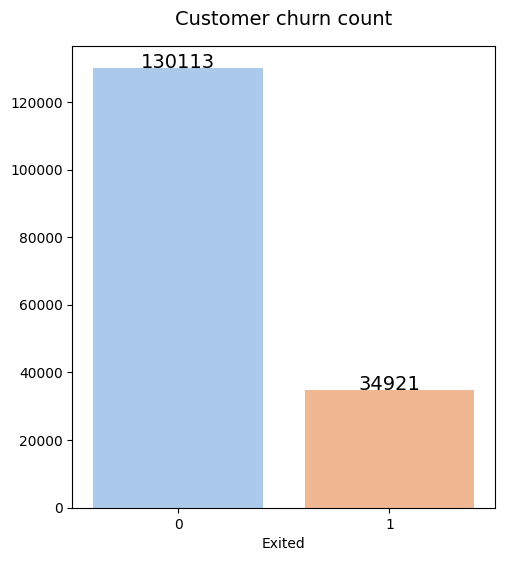

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
churn_rate = target.value_counts()
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='pastel')
plt.title("Customer churn count", fontweight="light", size=14, pad=15)
for i, v in enumerate(churn_rate.values):
    plt.text(i, v, v, ha="center", fontsize=14)

plt.show()


From the above figure it can be observed that the dataset is highly **Imbalanced**

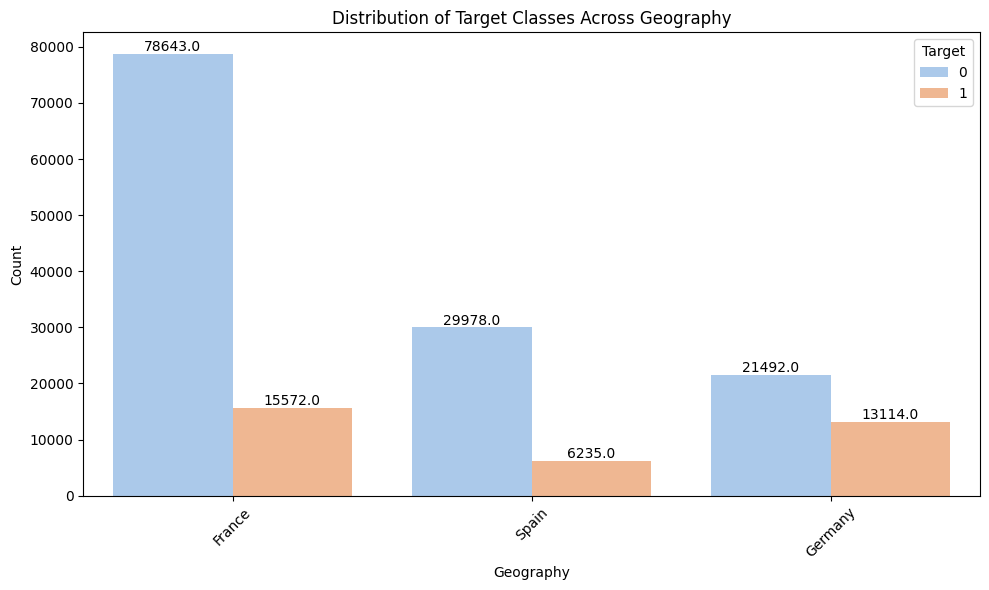

In [17]:
plt.figure(figsize=(10, 6))
plot_1 = sns.countplot(data=data, x='Geography', hue= target, palette='pastel')
plt.title('Distribution of Target Classes Across Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')
plt.xticks(rotation=45)  

for p in plot_1.patches:
    plot_1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.tight_layout()
plt.show()

From the above plot it can be observed that highest number of customers are from France

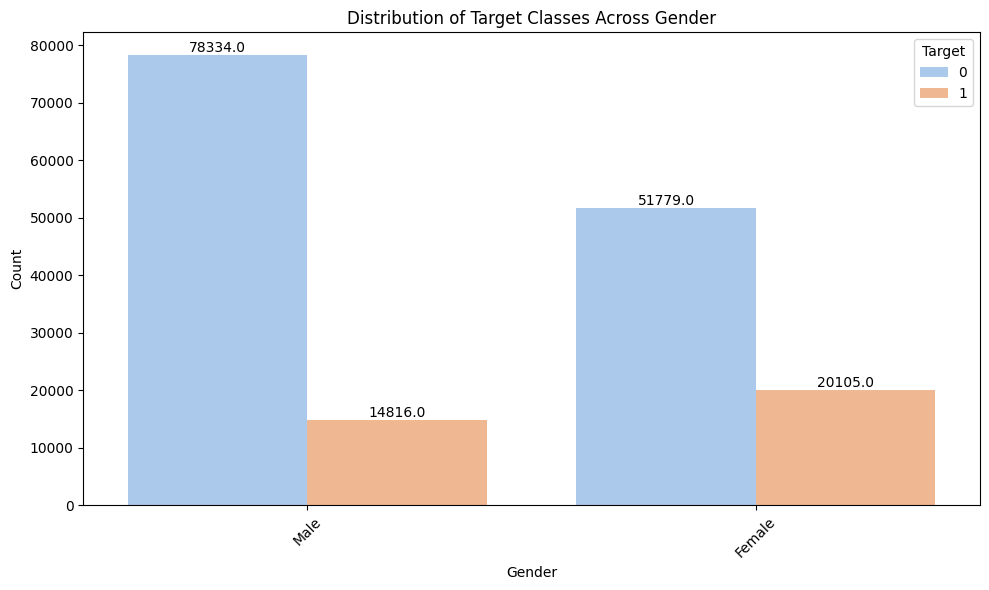

In [18]:
plt.figure(figsize=(10, 6))
plot_2 =sns.countplot(data= data, x='Gender', hue=target, palette='pastel')
plt.title('Distribution of Target Classes Across Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')
plt.xticks(rotation=45)

for p in plot_2.patches:
    plot_2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

data_train,data_test,target_train,target_test = train_test_split(data,target,test_size = 0.2)

In [20]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [21]:
#Numerical Transformers
num_transformer = Pipeline(steps=[('numeric','passthrough')])
num_transformer_ss = Pipeline(steps=[('ss',StandardScaler())])
num_transformer_rs = Pipeline(steps=[('rs',RobustScaler())])

#Categorical Transformers
cat_transformer_ohe = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])
cat_transformer_oe = Pipeline(steps=[('oe', OrdinalEncoder())])

In [22]:
preprocess_oe = ColumnTransformer(
transformers=[
    ('num',num_transformer,numerical_columns),
    ('cat', cat_transformer_oe,categorical_columns)
])

preprocess_ss_ohe = ColumnTransformer(
transformers=[
    ('num',num_transformer_ss,numerical_columns),
    ('cat', cat_transformer_ohe,categorical_columns)
])

preprocess_rs_ohe = ColumnTransformer(
transformers=[
    ('num',num_transformer_rs,numerical_columns),
    ('cat', cat_transformer_ohe,categorical_columns)
])

# Baseline Model

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg_1 = Pipeline(steps=[
    ('preprocessor',preprocess_ss_ohe),
    ('classifier',LogisticRegression(random_state=42))
])

log_reg_2 = Pipeline(steps=[
    ('preprocessor',preprocess_rs_ohe),
    ('classifier',LogisticRegression(random_state=42))
])

In [24]:
log_reg_1.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [25]:
target_predicted_lr1 = log_reg_1.predict(data_test)

auc_roc_score_1 = roc_auc_score(target_test,target_predicted_lr1)

print("AUC-ROC Score for model 1 using StandardScaler:", auc_roc_score_1)

AUC-ROC Score for model 1 using StandardScaler: 0.6751330949698464


In [26]:
log_reg_2.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('rs',
                                                                   RobustScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [27]:
target_predicted_lr2 = log_reg_2.predict(data_test)

auc_roc_score_2 = roc_auc_score(target_test,target_predicted_lr2)

print("AUC-ROC Score for model 2 using RobustScaler:", auc_roc_score_2)

AUC-ROC Score for model 2 using RobustScaler: 0.6751330949698464


In [28]:
#Using Decision tree 

dec_tree = Pipeline(steps=[
    ('preprocessor',preprocess_oe),
    ('classifier',DecisionTreeClassifier(random_state=42))
])

In [29]:
dec_tree.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric',
                                                                   'passthrough')]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [30]:
target_predicted_dt = dec_tree.predict(data_test)

auc_roc_score_3 = roc_auc_score(target_test,target_predicted_dt)

print("AUC-ROC Score for model 3 using DecisionTree:", auc_roc_score_3)

AUC-ROC Score for model 3 using DecisionTree: 0.7001880839995455


# Ensemble Models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [32]:
#Using RandomForest

rf = Pipeline(steps=[
    ('preprocessor',preprocess_oe),
    ('classifier',RandomForestClassifier(random_state=42))
])

In [33]:
rf.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric',
                                                                   'passthrough')]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [34]:
target_predicted_rf = rf.predict(data_test)

auc_roc_score_4 = roc_auc_score(target_test,target_predicted_rf)

print("AUC-ROC Score for model 4 using RandomForest:", auc_roc_score_4)

AUC-ROC Score for model 4 using RandomForest: 0.7403085356127895


In [35]:
#Using hgb

hgb = Pipeline(steps=[
    ('preprocessor',preprocess_oe),
    ('classifier',HistGradientBoostingClassifier(class_weight='balanced'))
])

In [36]:
hgb.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric',
                                                                   'passthrough')]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 HistGradientBoostingClassifier(class_weight='balanced'))])

In [37]:
target_predicted_hgb = hgb.predict(data_test)

auc_roc_score_5 = roc_auc_score(target_test,target_predicted_hgb)

print("AUC-ROC Score for model 5 using HistGradientBoosting:", auc_roc_score_5)

AUC-ROC Score for model 5 using HistGradientBoosting: 0.8060683417062336


In [38]:
#using slightly modified hgb

hgb_2 = Pipeline(steps=[
    ('preprocessor',preprocess_oe),
    ('classifier',HistGradientBoostingClassifier(class_weight='balanced',early_stopping=True, validation_fraction=0.1, n_iter_no_change=5, random_state=42))
])

In [39]:
hgb_2.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric',
                                                                   'passthrough')]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                early_stopping=True,
                                                n_iter_no_change=5,
                                                random_state=42))])

In [40]:
target_predicted_hgb_2 = hgb_2.predict(data_test)

auc_roc_score_6 = roc_auc_score(target_test,target_predicted_hgb)

print("AUC-ROC Score for model 6 using HistGradientBoosting:", auc_roc_score_6)

AUC-ROC Score for model 6 using HistGradientBoosting: 0.8060683417062336


In [41]:
#Using lgbm

from lightgbm import LGBMClassifier

lgbm = Pipeline(steps=[
    ('preprocessor',preprocess_oe),
    ('classifier',LGBMClassifier(class_weight='balanced'))
])

In [42]:
lgbm.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric',
                                                                   'passthrough')]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LGBMClassifier(class_weight='balanced'))])

In [43]:
target_predicted_lgbm = lgbm.predict(data_test)

auc_roc_score_7 = roc_auc_score(target_test,target_predicted_lgbm)

print("AUC-ROC Score for model 7 using LGBM:", auc_roc_score_7)

AUC-ROC Score for model 7 using LGBM: 0.8064186301431965


In [44]:
#Using lgbm modified

from lightgbm import LGBMClassifier

lgbm_2 = Pipeline(steps=[
    ('preprocessor',preprocess_oe),
    ('classifier',LGBMClassifier(is_unbalance = True))
])

In [45]:
lgbm_2.fit(data_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric',
                                                                   'passthrough')]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LGBMClassifier(is_unbalance=True))])

In [46]:
target_predicted_lgbm_2 = lgbm_2.predict(data_test)

auc_roc_score_8 = roc_auc_score(target_test,target_predicted_lgbm_2)

print("AUC-ROC Score for model 8 using LGBM:", auc_roc_score_8)

AUC-ROC Score for model 8 using LGBM: 0.8068648547250612


In [47]:
'''import optuna
def objective(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
        'max_bin': trial.suggest_int('max_bin', 100, 500),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 100),
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 1e-3, 10.0),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-3, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-3, 10.0),
        'min_gain_to_split': trial.suggest_loguniform('min_gain_to_split', 1e-4, 10.0),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'extra_trees': trial.suggest_categorical('extra_trees', [True, False]),
        'path_smooth': trial.suggest_int('path_smooth', 1, 10)
    }

    # Combine preprocessing with LightGBM classifier
    lgb_optuna = Pipeline(steps=[
        ('preprocessor', preprocess_oe),
        ('classifier', LGBMClassifier(**params))
    ])

    # Training the model
    lgb_optuna.fit(data_train, target_train)

    # Predictions
    target_predicted_lgb_optuna = lgb_optuna.predict(data_test)

    # Evaluating accuracy
    auc_roc_score_8 = roc_auc_score(target_test, target_predicted_lgb_optuna)

    return auc_roc_score_8

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", study.best_params)
print("Best Score:", study.best_value)'''

'import optuna\ndef objective(trial):\n    # Define hyperparameters to tune\n    params = {\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 50, 1000),\n        \'learning_rate\': trial.suggest_loguniform(\'learning_rate\', 0.01, 0.1),\n        \'num_leaves\': trial.suggest_int(\'num_leaves\', 2, 100),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 3, 20),\n        \'reg_alpha\': trial.suggest_loguniform(\'reg_alpha\', 1e-3, 10.0),\n        \'reg_lambda\': trial.suggest_loguniform(\'reg_lambda\', 1e-3, 10.0),\n        \'bagging_fraction\': trial.suggest_uniform(\'bagging_fraction\', 0.6, 1.0),\n        \'bagging_freq\': trial.suggest_int(\'bagging_freq\', 1, 10),\n        \'feature_fraction\': trial.suggest_uniform(\'feature_fraction\', 0.6, 1.0),\n        \'max_bin\': trial.suggest_int(\'max_bin\', 100, 500),\n        \'min_data_in_leaf\': trial.suggest_int(\'min_data_in_leaf\', 5, 100),\n        \'min_sum_hessian_in_leaf\': trial.suggest_loguniform(\'min_sum_h

In [48]:
sub_df = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
sub_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [49]:
final_sub = sub_df.drop(['id','Surname','CustomerId']
                         ,axis = 1)
output = lgbm.predict_proba(final_sub)
final_output = output[:,1]

sub_df_leaderboard = pd.DataFrame()
sub_df_leaderboard ['id'] = sub_df['id']
sub_df_leaderboard ['Exited'] = final_output

sub_df_leaderboard.head()

,id,Exited
0,165034,0.090862
1,165035,0.947638
2,165036,0.092526
3,165037,0.530356
4,165038,0.674097


In [50]:
sub_df_leaderboard.to_csv("submission.csv", index = False)

In [51]:
c = pd.read_csv("/kaggle/working/submission.csv")
c.head()

,id,Exited
0,165034,0.090862
1,165035,0.947638
2,165036,0.092526
3,165037,0.530356
4,165038,0.674097
